### 1. Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Warnings

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

### 3. Read Data

In [3]:
data = pd.read_csv('./data/DAILY_DATA.csv')
data = data[['date', 'USD', 'CHF', 'EUR', 'JPY(100)', 'GBP', 'CAD']].set_index('date')

### 4. Data Head

In [4]:
data

,USD,CHF,EUR,JPY(100),GBP,CAD
date,,,,,,
2010-01-04,1161.0,1128.17,1673.46,1256.50,1883.46,1110.15
2010-01-05,1147.3,1122.31,1665.97,1250.96,1860.44,1109.76
2010-01-06,1141.4,1106.67,1643.96,1248.35,1829.39,1101.19
2010-01-07,1132.0,1107.41,1639.52,1232.35,1822.54,1102.69
2010-01-08,1134.1,1095.46,1621.38,1211.91,1804.73,1095.51
...,...,...,...,...,...,...
2020-01-10,1160.0,1192.13,1288.47,1059.60,1516.00,888.34
2020-01-13,1161.1,1192.89,1290.74,1059.93,1514.48,888.85
2020-01-14,1155.7,1190.52,1286.93,1051.35,1501.25,885.39


### 5. Correlation

In [5]:
data.corr()

,USD,CHF,EUR,JPY(100),GBP,CAD
USD,1.000000,0.125248,-0.077971,0.190944,-0.042640,-0.009124
CHF,0.125248,1.000000,0.328998,0.396004,0.343779,0.299625
EUR,-0.077971,0.328998,1.000000,0.782931,0.723444,0.897948
JPY(100),0.190944,0.396004,0.782931,1.000000,0.553532,0.871198
GBP,-0.042640,0.343779,0.723444,0.553532,1.000000,0.761576
CAD,-0.009124,0.299625,0.897948,0.871198,0.761576,1.000000


### 6. Result DataFrame

In [6]:
# Valid RMSE 결과 저장 데이터 프레임
Test_rmse = pd.DataFrame()

# 2020년 예측값 저장 데이터 프레임
pred_2020 = pd.DataFrame()

### 7. Model

In [7]:
# Model Training

# 예측하고 싶은 기간
TARGET_DAY = 60

# 60일까지 예측
for days in range(1,TARGET_DAY+1) : 
    
    # Read Data
    data = pd.read_csv('./data/DAILY_DATA.csv')
    data = data[['date', 'USD', 'CHF', 'EUR', 'JPY(100)', 'GBP', 'CAD']].set_index('date')
    
    # 예측 지점 표시
    print('현재 {}일 뒤 예측 중..........' .format(days))
        
    # N일 뒤 예측을 위한 데이터셋 생성
    
    # Feature List
    feature_list = ['USD', 'CHF', 'EUR', 'JPY(100)', 'GBP', 'CAD']

    # Data Shfit (1 ~ 60일의 과거의 데이터를 사용)
    for step1 in feature_list : 
        for step2 in range(days,days+60):
            data['{}_shift-{}'.format(step1,step2)] = data[step1].shift(step2)

    # Data NaN Omit
    data = data.dropna()
        
    # 2019년 12월 31일 행 뽑아내기
    if days == 1 : 
        pred_20191231 = data[2414-days:2415-days]
        pred_20191231 = pred_20191231[pred_20191231.columns[6:]]
        
    # X, y
    X = data[data.columns[6:]]
    y = data[data.columns[0]]
    
    # Train Valid Test Split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    # Sklearn Linear Regression
    from sklearn.linear_model import LinearRegression
    model = LinearRegression().fit(X_train, y_train)
    
    # RMSE
    from sklearn.metrics import mean_squared_error
    pred_train = model.predict(X_train)
    print("Train rmse : {:.8f}" .format(mean_squared_error(y_train, pred_train)**0.5))
    pred_test = model.predict(X_test)
    print("Test rmse : {:.8f}" .format(mean_squared_error(y_test, pred_test)**0.5))
    
    # Valid RMSE 결과 저장
    temp = pd.DataFrame(np.array([[days,mean_squared_error(y_test, pred_test)**0.5]]), columns=['days','rmse'])
    Test_rmse = Test_rmse.append(temp)
        
    # 2020년 예측
    print("예측값 : {}" .format(model.predict(pred_20191231).reshape(-1)))
    
    # 예측값 데이터프레임으로 저장
    temp = pd.DataFrame({'y_pred' : model.predict(pred_20191231).reshape(-1)})
    pred_2020 = pred_2020.append(temp)
        
    # N일 뒤 예측 종료
    print('\n')

현재 1일 뒤 예측 중..........
Train rmse : 5.65796134
Test rmse : 6.20132498
예측값 : [1158.82374784]


현재 2일 뒤 예측 중..........
Train rmse : 7.59967007
Test rmse : 10.04875977
예측값 : [1158.58114208]


현재 3일 뒤 예측 중..........
Train rmse : 9.28270969
Test rmse : 11.64459118
예측값 : [1157.06815123]


현재 4일 뒤 예측 중..........
Train rmse : 10.61508080
Test rmse : 12.63729555
예측값 : [1157.09232694]


현재 5일 뒤 예측 중..........
Train rmse : 11.61348970
Test rmse : 15.24847872
예측값 : [1152.86138055]


현재 6일 뒤 예측 중..........
Train rmse : 12.58251716
Test rmse : 16.09770275
예측값 : [1153.1243247]


현재 7일 뒤 예측 중..........
Train rmse : 13.43247438
Test rmse : 18.02278473
예측값 : [1156.6399832]


현재 8일 뒤 예측 중..........
Train rmse : 14.06778248
Test rmse : 20.62029788
예측값 : [1157.05998064]


현재 9일 뒤 예측 중..........
Train rmse : 14.91965412
Test rmse : 20.20252505
예측값 : [1154.09985026]


현재 10일 뒤 예측 중..........
Train rmse : 15.47930828
Test rmse : 22.38416915
예측값 : [1152.20480464]


현재 11일 뒤 예측 중..........
Train rmse : 16.12750

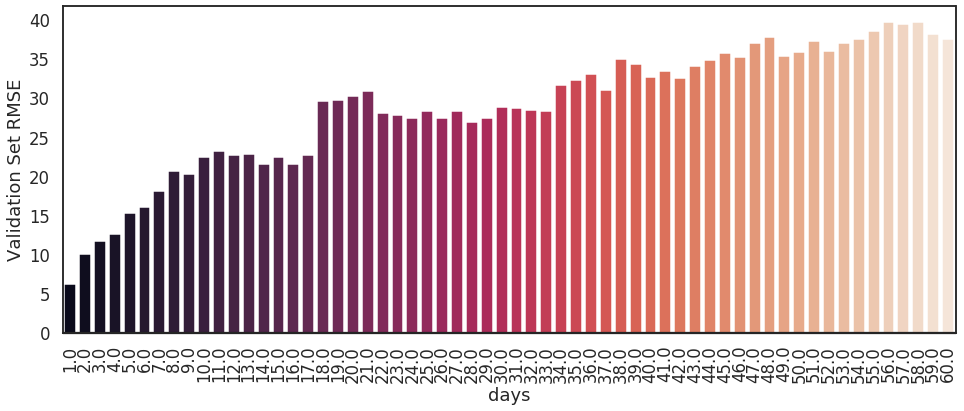

In [8]:
# Plot Style
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(1, 1, figsize=(16, 6), sharex=True)

# Graph
plot = sns.barplot(x=Test_rmse.days, y=Test_rmse.rmse, palette='rocket', ax=ax)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("Validation Set RMSE")
plt.show()

### 8. Predict

In [9]:
# 2020년 예측값
pred_2020 = pred_2020[['y_pred']].reset_index()
pred_2020 = pred_2020[['y_pred']]

# 2020년 데이터 가져오기
data_2020 = pd.read_csv('./data/DAILY_DATA.csv')
data_2020 = data_2020[['date', 'USD']][-11:]
data_2020 = data_2020.reset_index()
data_2020['y_pred'] = pred_2020[['y_pred']]
data_2020 = data_2020[['date', 'USD', 'y_pred']].set_index('date')

# Result
data_2020

,USD,y_pred
date,,
2020-01-02,1157.8,1158.823748
2020-01-03,1156.9,1158.581142
2020-01-06,1162.7,1157.068151
2020-01-07,1169.6,1157.092327
2020-01-08,1165.3,1152.861381
2020-01-09,1174.1,1153.124325
2020-01-10,1160.0,1156.639983
2020-01-13,1161.1,1157.059981
2020-01-14,1155.7,1154.099850


### 9. Visualization

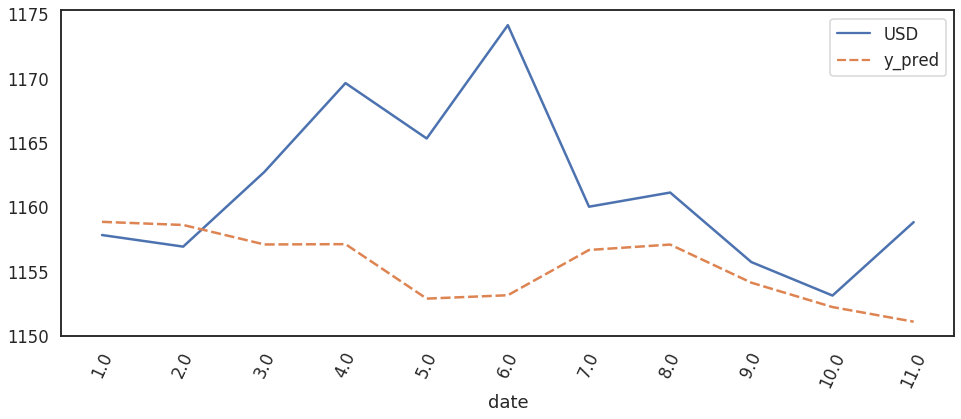

In [10]:
# Pred vs True Visualization
plt.figure(figsize = (16,6))
ax = sns.lineplot(data=data_2020, linewidth=2.5)
ax.set_xticklabels(plot.get_xticklabels(), rotation=65)
plt.show()